In [1]:
import numpy as np 
import importlib
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import csv
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

df=pd.read_csv("data.csv")
df

,Unnamed: 0,0,Block,Flat model,Flat type,Floor area sqm (Sqm),Lease commence date,Month,Remaining lease,Resale price ($),Storey range,Street name,Town
0,0,NaN,548A,Model A,4 ROOM,92.0,2015.0,2020-07,94 years 06 months,410000.0,13 TO 15,SEGAR RD,BUKIT PANJANG
1,1,NaN,456,Premium Apartment,4 ROOM,93.0,2012.0,2020-07,91 years 05 months,395000.0,07 TO 09,SEGAR RD,BUKIT PANJANG
2,2,NaN,547B,Model A,4 ROOM,92.0,2015.0,2020-07,94 years 01 month,405888.0,04 TO 06,SEGAR RD,BUKIT PANJANG
3,3,NaN,547A,Model A,4 ROOM,92.0,2015.0,2020-07,94 years 01 month,450000.0,16 TO 18,SEGAR RD,BUKIT PANJANG
4,4,NaN,550B,Model A,4 ROOM,92.0,2015.0,2020-07,94 years 06 months,425000.0,10 TO 12,SEGAR RD,BUKIT PANJANG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,NaN,643,Maisonette,EXECUTIVE,146.0,1987.0,2020-07,66 years 03 months,575000.0,10 TO 12,YISHUN ST 61,YISHUN
1996,1,NaN,614,Maisonette,EXECUTIVE,146.0,1987.0,2020-07,65 years 10 months,568888.0,04 TO 06,YISHUN ST 61,YISHUN
1997,2,NaN,643,Apartment,EXECUTIVE,142.0,1987.0,2020-07,66 years 02 months,540000.0,10 TO 12,YISHUN ST 61,YISHUN
1998,3,NaN,724,Apartment,EXECUTIVE,145.0,1986.0,2020-07,65 years,535000.0,04 TO 06,YISHUN ST 71,YISHUN


In [2]:
df.drop(df.columns[[0,1]], axis=1, inplace=True)

In [3]:
df.head()  #check for updated headers

,Block,Flat model,Flat type,Floor area sqm (Sqm),Lease commence date,Month,Remaining lease,Resale price ($),Storey range,Street name,Town
0,548A,Model A,4 ROOM,92.0,2015.0,2020-07,94 years 06 months,410000.0,13 TO 15,SEGAR RD,BUKIT PANJANG
1,456,Premium Apartment,4 ROOM,93.0,2012.0,2020-07,91 years 05 months,395000.0,07 TO 09,SEGAR RD,BUKIT PANJANG
2,547B,Model A,4 ROOM,92.0,2015.0,2020-07,94 years 01 month,405888.0,04 TO 06,SEGAR RD,BUKIT PANJANG
3,547A,Model A,4 ROOM,92.0,2015.0,2020-07,94 years 01 month,450000.0,16 TO 18,SEGAR RD,BUKIT PANJANG
4,550B,Model A,4 ROOM,92.0,2015.0,2020-07,94 years 06 months,425000.0,10 TO 12,SEGAR RD,BUKIT PANJANG


In [4]:
df.columns  #check for trailing white spaces


Index(['Block', 'Flat model', 'Flat type', 'Floor area sqm (Sqm)',
       'Lease commence date', 'Month', 'Remaining lease', 'Resale price ($)',
       'Storey range', 'Street name', 'Town'],
      dtype='object')

In [5]:
df.info()  #look at data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Block                 2000 non-null   object 
 1   Flat model            2000 non-null   object 
 2   Flat type             2000 non-null   object 
 3   Floor area sqm (Sqm)  2000 non-null   float64
 4   Lease commence date   2000 non-null   float64
 5   Month                 2000 non-null   object 
 6   Remaining lease       2000 non-null   object 
 7   Resale price ($)      2000 non-null   float64
 8   Storey range          2000 non-null   object 
 9   Street name           2000 non-null   object 
 10  Town                  2000 non-null   object 
dtypes: float64(3), object(8)
memory usage: 172.0+ KB


In [6]:
df.replace({'Flat type':{'1 ROOM':1,'2 ROOM':2,'3 ROOM':3,'4 ROOM':4,'5 ROOM':5,'EXECUTIVE':6,'MULTI-GENERATION':7}},inplace = True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Block                 2000 non-null   object 
 1   Flat model            2000 non-null   object 
 2   Flat type             2000 non-null   int64  
 3   Floor area sqm (Sqm)  2000 non-null   float64
 4   Lease commence date   2000 non-null   float64
 5   Month                 2000 non-null   object 
 6   Remaining lease       2000 non-null   object 
 7   Resale price ($)      2000 non-null   float64
 8   Storey range          2000 non-null   object 
 9   Street name           2000 non-null   object 
 10  Town                  2000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 172.0+ KB


,Block,Flat model,Flat type,Floor area sqm (Sqm),Lease commence date,Month,Remaining lease,Resale price ($),Storey range,Street name,Town
0,548A,Model A,4,92.0,2015.0,2020-07,94 years 06 months,410000.0,13 TO 15,SEGAR RD,BUKIT PANJANG
1,456,Premium Apartment,4,93.0,2012.0,2020-07,91 years 05 months,395000.0,07 TO 09,SEGAR RD,BUKIT PANJANG
2,547B,Model A,4,92.0,2015.0,2020-07,94 years 01 month,405888.0,04 TO 06,SEGAR RD,BUKIT PANJANG
3,547A,Model A,4,92.0,2015.0,2020-07,94 years 01 month,450000.0,16 TO 18,SEGAR RD,BUKIT PANJANG
4,550B,Model A,4,92.0,2015.0,2020-07,94 years 06 months,425000.0,10 TO 12,SEGAR RD,BUKIT PANJANG
...,...,...,...,...,...,...,...,...,...,...,...
1995,643,Maisonette,6,146.0,1987.0,2020-07,66 years 03 months,575000.0,10 TO 12,YISHUN ST 61,YISHUN
1996,614,Maisonette,6,146.0,1987.0,2020-07,65 years 10 months,568888.0,04 TO 06,YISHUN ST 61,YISHUN
1997,643,Apartment,6,142.0,1987.0,2020-07,66 years 02 months,540000.0,10 TO 12,YISHUN ST 61,YISHUN
1998,724,Apartment,6,145.0,1986.0,2020-07,65 years,535000.0,04 TO 06,YISHUN ST 71,YISHUN


In [7]:
dflease = pd.DataFrame(df['Remaining lease'].str.split(' ',3).tolist(),columns = ['Remaining Lease Years','Years','Remaining Lease Months','Months'])

In [8]:
dflease = dflease.drop(['Years','Months'], axis=1)
dflease

,Remaining Lease Years,Remaining Lease Months
0,94,06
1,91,05
2,94,01
3,94,01
4,94,06
...,...,...
1995,66,03
1996,65,10
1997,66,02
1998,65,None


In [9]:
dflease.replace({'Remaining Lease Months':{'None':0}},inplace = True)

dflease

,Remaining Lease Years,Remaining Lease Months
0,94,06
1,91,05
2,94,01
3,94,01
4,94,06
...,...,...
1995,66,03
1996,65,10
1997,66,02
1998,65,None


In [10]:
dflease = dflease.apply(pd.to_numeric)
dflease


,Remaining Lease Years,Remaining Lease Months
0,94,6.0
1,91,5.0
2,94,1.0
3,94,1.0
4,94,6.0
...,...,...
1995,66,3.0
1996,65,10.0
1997,66,2.0
1998,65,NaN


In [11]:
dflease.fillna(0, inplace=True)
dflease

,Remaining Lease Years,Remaining Lease Months
0,94,6.0
1,91,5.0
2,94,1.0
3,94,1.0
4,94,6.0
...,...,...
1995,66,3.0
1996,65,10.0
1997,66,2.0
1998,65,0.0


In [12]:
dflease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Remaining Lease Years   2000 non-null   int64  
 1   Remaining Lease Months  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [13]:
dflease['Remaining Lease Months wrt12'] = dflease['Remaining Lease Months'].apply(lambda x: x/12.0, 0)

dflease

,Remaining Lease Years,Remaining Lease Months,Remaining Lease Months wrt12
0,94,6.0,0.5
1,91,5.0,0.416667
2,94,1.0,0.0833333
3,94,1.0,0.0833333
4,94,6.0,0.5
...,...,...,...
1995,66,3.0,0.25
1996,65,10.0,0.833333
1997,66,2.0,0.166667
1998,65,0.0,0


In [14]:
dflease['Net Remaining Lease Years'] = dflease['Remaining Lease Months wrt12'] + dflease['Remaining Lease Years']

In [15]:
dflease

,Remaining Lease Years,Remaining Lease Months,Remaining Lease Months wrt12,Net Remaining Lease Years
0,94,6.0,0.5,94.5
1,91,5.0,0.416667,91.4167
2,94,1.0,0.0833333,94.0833
3,94,1.0,0.0833333,94.0833
4,94,6.0,0.5,94.5
...,...,...,...,...
1995,66,3.0,0.25,66.25
1996,65,10.0,0.833333,65.8333
1997,66,2.0,0.166667,66.1667
1998,65,0.0,0,65


In [16]:
dflease.drop(['Remaining Lease Years', 'Remaining Lease Months', 'Remaining Lease Months wrt12'], inplace=True, axis=1)
dflease
dflease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Net Remaining Lease Years  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [17]:
dflease = dflease.apply(pd.to_numeric)

In [18]:
dflease

,Net Remaining Lease Years
0,94.500000
1,91.416667
2,94.083333
3,94.083333
4,94.500000
...,...
1995,66.250000
1996,65.833333
1997,66.166667
1998,65.000000


In [19]:
dflease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Net Remaining Lease Years  2000 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


In [20]:

df = pd.merge(df, dflease, left_index=True, right_index=True, how='outer')
df

,Block,Flat model,Flat type,Floor area sqm (Sqm),Lease commence date,Month,Remaining lease,Resale price ($),Storey range,Street name,Town,Net Remaining Lease Years
0,548A,Model A,4,92.0,2015.0,2020-07,94 years 06 months,410000.0,13 TO 15,SEGAR RD,BUKIT PANJANG,94.500000
1,456,Premium Apartment,4,93.0,2012.0,2020-07,91 years 05 months,395000.0,07 TO 09,SEGAR RD,BUKIT PANJANG,91.416667
2,547B,Model A,4,92.0,2015.0,2020-07,94 years 01 month,405888.0,04 TO 06,SEGAR RD,BUKIT PANJANG,94.083333
3,547A,Model A,4,92.0,2015.0,2020-07,94 years 01 month,450000.0,16 TO 18,SEGAR RD,BUKIT PANJANG,94.083333
4,550B,Model A,4,92.0,2015.0,2020-07,94 years 06 months,425000.0,10 TO 12,SEGAR RD,BUKIT PANJANG,94.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,643,Maisonette,6,146.0,1987.0,2020-07,66 years 03 months,575000.0,10 TO 12,YISHUN ST 61,YISHUN,66.250000
1996,614,Maisonette,6,146.0,1987.0,2020-07,65 years 10 months,568888.0,04 TO 06,YISHUN ST 61,YISHUN,65.833333
1997,643,Apartment,6,142.0,1987.0,2020-07,66 years 02 months,540000.0,10 TO 12,YISHUN ST 61,YISHUN,66.166667
1998,724,Apartment,6,145.0,1986.0,2020-07,65 years,535000.0,04 TO 06,YISHUN ST 71,YISHUN,65.000000


In [21]:

dfstorey= df['Storey range'].str.split(expand = True)



dfstorey

,0,1,2
0,13,TO,15
1,07,TO,09
2,04,TO,06
3,16,TO,18
4,10,TO,12
...,...,...,...
1995,10,TO,12
1996,04,TO,06
1997,10,TO,12
1998,04,TO,06


In [22]:
dfstorey.drop([1], axis=1, inplace=True)

In [23]:
dfstorey

,0,2
0,13,15
1,07,09
2,04,06
3,16,18
4,10,12
...,...,...
1995,10,12
1996,04,06
1997,10,12
1998,04,06


In [24]:
dfstorey = dfstorey.apply(pd.to_numeric)

In [25]:
dfstorey['Mean Storey'] = dfstorey.mean(axis = 1)
dfstorey

,0,2,Mean Storey
0,13,15,14.0
1,7,9,8.0
2,4,6,5.0
3,16,18,17.0
4,10,12,11.0
...,...,...,...
1995,10,12,11.0
1996,4,6,5.0
1997,10,12,11.0
1998,4,6,5.0


In [26]:
dfstorey.drop(([0]), axis=1, inplace=True)
dfstorey.drop(([2]), axis=1, inplace=True)
dfstorey

,Mean Storey
0,14.0
1,8.0
2,5.0
3,17.0
4,11.0
...,...
1995,11.0
1996,5.0
1997,11.0
1998,5.0


In [27]:
df = pd.merge(df, dfstorey, left_index=True, right_index=True, how='outer')

In [28]:
df.head()

,Block,Flat model,Flat type,Floor area sqm (Sqm),Lease commence date,Month,Remaining lease,Resale price ($),Storey range,Street name,Town,Net Remaining Lease Years,Mean Storey
0,548A,Model A,4,92.0,2015.0,2020-07,94 years 06 months,410000.0,13 TO 15,SEGAR RD,BUKIT PANJANG,94.500000,14.0
1,456,Premium Apartment,4,93.0,2012.0,2020-07,91 years 05 months,395000.0,07 TO 09,SEGAR RD,BUKIT PANJANG,91.416667,8.0
2,547B,Model A,4,92.0,2015.0,2020-07,94 years 01 month,405888.0,04 TO 06,SEGAR RD,BUKIT PANJANG,94.083333,5.0
3,547A,Model A,4,92.0,2015.0,2020-07,94 years 01 month,450000.0,16 TO 18,SEGAR RD,BUKIT PANJANG,94.083333,17.0
4,550B,Model A,4,92.0,2015.0,2020-07,94 years 06 months,425000.0,10 TO 12,SEGAR RD,BUKIT PANJANG,94.500000,11.0


In [29]:
df

,Block,Flat model,Flat type,Floor area sqm (Sqm),Lease commence date,Month,Remaining lease,Resale price ($),Storey range,Street name,Town,Net Remaining Lease Years,Mean Storey
0,548A,Model A,4,92.0,2015.0,2020-07,94 years 06 months,410000.0,13 TO 15,SEGAR RD,BUKIT PANJANG,94.500000,14.0
1,456,Premium Apartment,4,93.0,2012.0,2020-07,91 years 05 months,395000.0,07 TO 09,SEGAR RD,BUKIT PANJANG,91.416667,8.0
2,547B,Model A,4,92.0,2015.0,2020-07,94 years 01 month,405888.0,04 TO 06,SEGAR RD,BUKIT PANJANG,94.083333,5.0
3,547A,Model A,4,92.0,2015.0,2020-07,94 years 01 month,450000.0,16 TO 18,SEGAR RD,BUKIT PANJANG,94.083333,17.0
4,550B,Model A,4,92.0,2015.0,2020-07,94 years 06 months,425000.0,10 TO 12,SEGAR RD,BUKIT PANJANG,94.500000,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,643,Maisonette,6,146.0,1987.0,2020-07,66 years 03 months,575000.0,10 TO 12,YISHUN ST 61,YISHUN,66.250000,11.0
1996,614,Maisonette,6,146.0,1987.0,2020-07,65 years 10 months,568888.0,04 TO 06,YISHUN ST 61,YISHUN,65.833333,5.0
1997,643,Apartment,6,142.0,1987.0,2020-07,66 years 02 months,540000.0,10 TO 12,YISHUN ST 61,YISHUN,66.166667,11.0
1998,724,Apartment,6,145.0,1986.0,2020-07,65 years,535000.0,04 TO 06,YISHUN ST 71,YISHUN,65.000000,5.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Block                      2000 non-null   object 
 1   Flat model                 2000 non-null   object 
 2   Flat type                  2000 non-null   int64  
 3   Floor area sqm (Sqm)       2000 non-null   float64
 4   Lease commence date        2000 non-null   float64
 5   Month                      2000 non-null   object 
 6   Remaining lease            2000 non-null   object 
 7   Resale price ($)           2000 non-null   float64
 8   Storey range               2000 non-null   object 
 9   Street name                2000 non-null   object 
 10  Town                       2000 non-null   object 
 11  Net Remaining Lease Years  2000 non-null   float64
 12  Mean Storey                2000 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDB1049B80>,
      dtype=object)

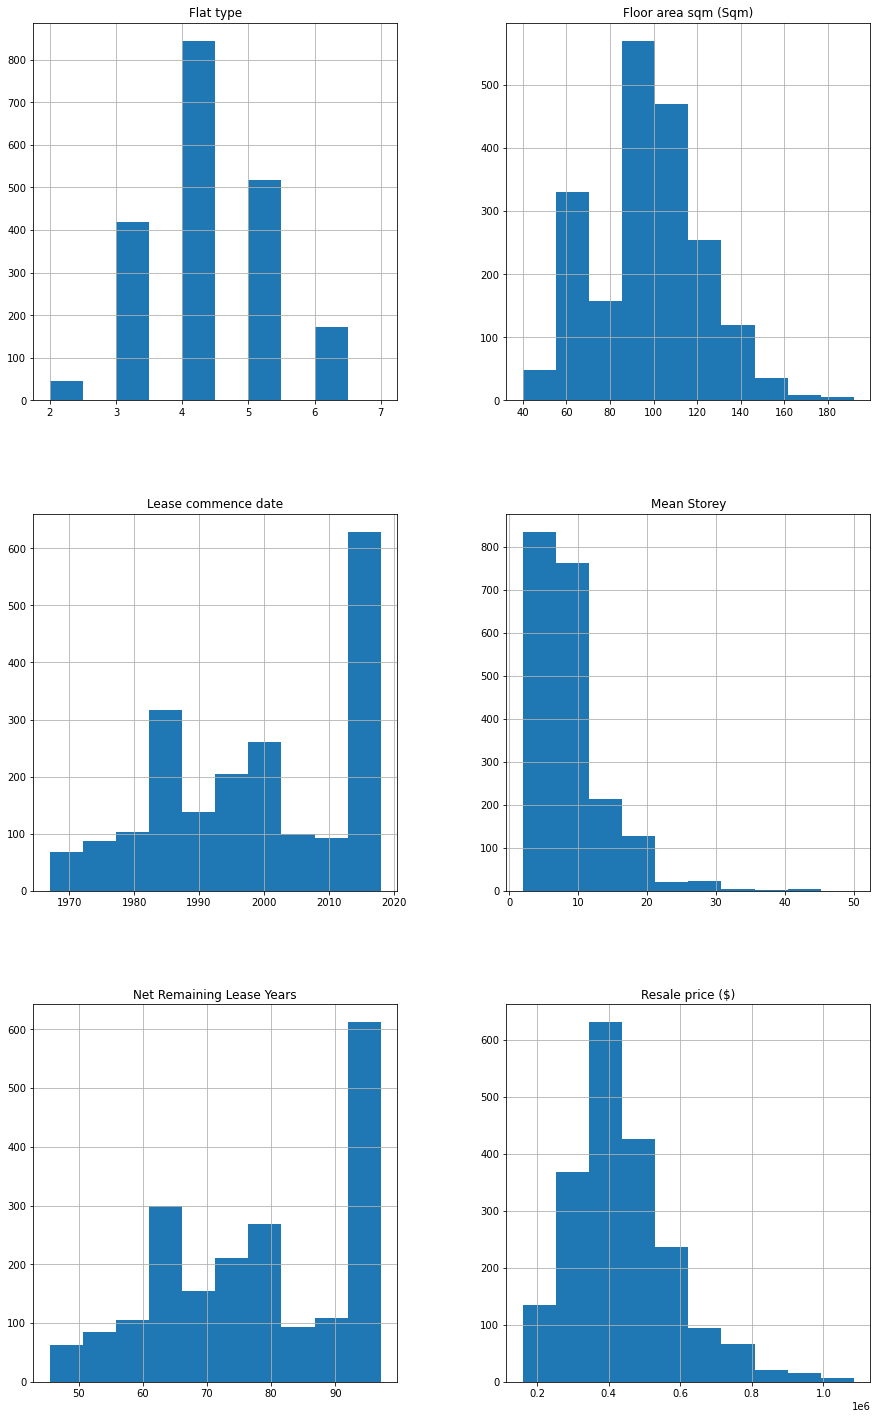

In [31]:
pd.DataFrame.hist(df,figsize=[15,25])

In [32]:
df.corr()

,Flat type,Floor area sqm (Sqm),Lease commence date,Resale price ($),Net Remaining Lease Years,Mean Storey
Flat type,1.000000,0.954163,0.126278,0.639631,0.126392,-0.035953
Floor area sqm (Sqm),0.954163,1.000000,0.058591,0.616324,0.058810,-0.087768
Lease commence date,0.126278,0.058591,1.000000,0.352550,0.999804,0.273534
Resale price ($),0.639631,0.616324,0.352550,1.000000,0.352381,0.307407
Net Remaining Lease Years,0.126392,0.058810,0.999804,0.352381,1.000000,0.272889
Mean Storey,-0.035953,-0.087768,0.273534,0.307407,0.272889,1.000000


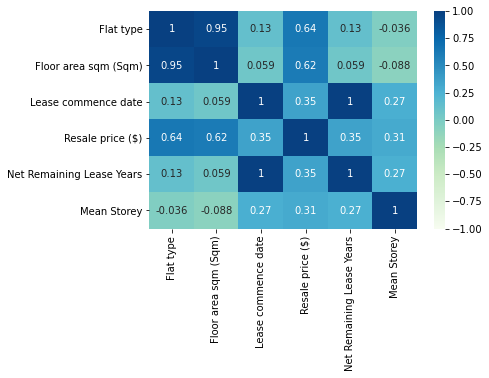

In [33]:
sns.heatmap(df.corr(), cmap="GnBu", annot=True, vmin=-1, vmax=1);

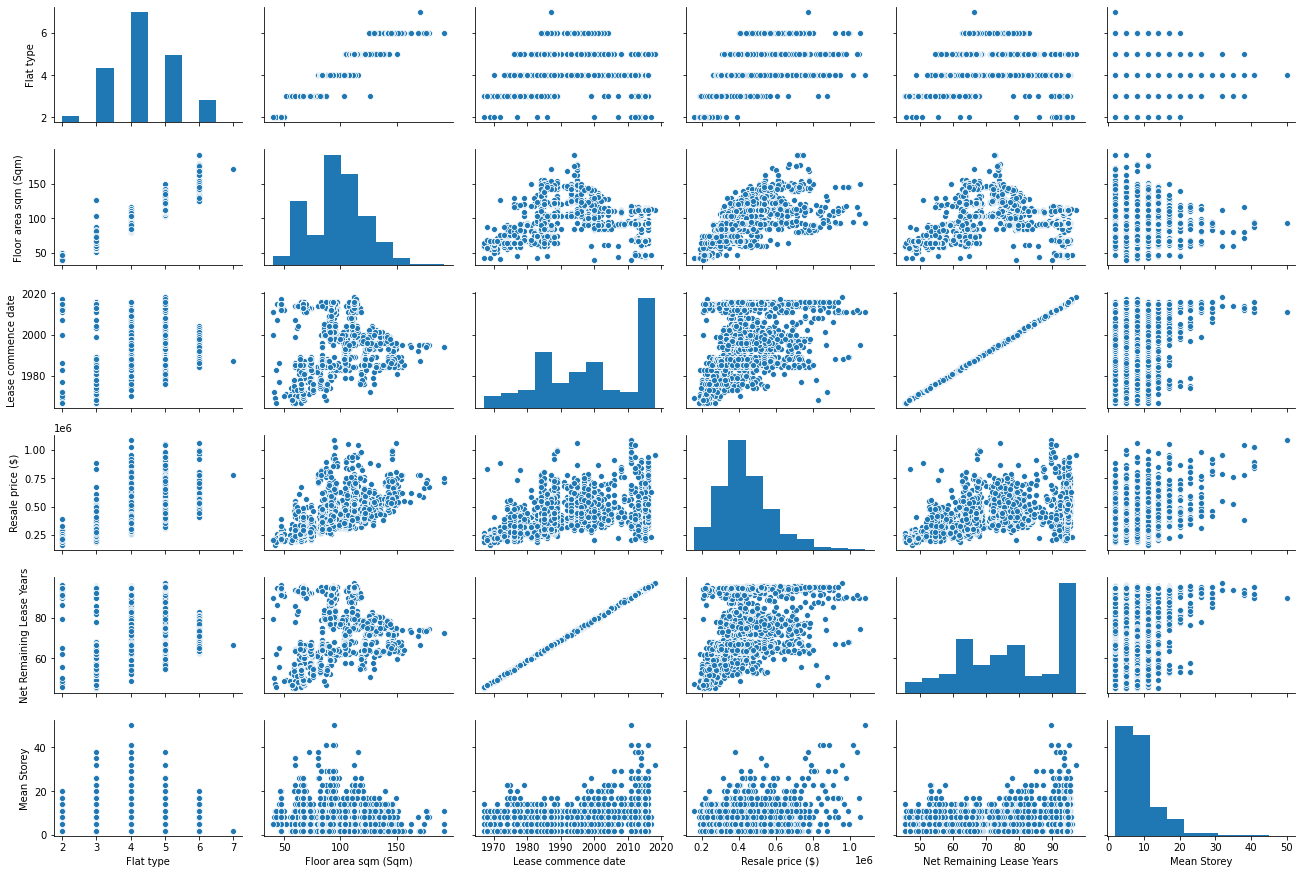

In [34]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df, height=2, aspect=1.5);

In [35]:
#From above, the Net Remaining lease Years is highly correlated to lease commence date, 
#flat type is highly correlated to floor area.
#To remove lease commence date and flat type since they can cause multicollinearity, 
#and there is little gain in making both highly correlated variables part of our regression.

#Take a look at only the 'resale price' column of the correlations and order it in descending order wih sort_values()

df.corr()['Resale price ($)'].sort_values(ascending=False)


Resale price ($)             1.000000
Flat type                    0.639631
Floor area sqm (Sqm)         0.616324
Lease commence date          0.352550
Net Remaining Lease Years    0.352381
Mean Storey                  0.307407
Name: Resale price ($), dtype: float64

In [36]:
#Remove Flat Type, Lease commence date 
# Resolve issue with feature name

df.rename(inplace=True,columns={'Resale price ($)': 'Resale_Price','Floor area sqm (Sqm)': 'Floor_Area_Sqm','Mean Storey': 'Mean_Storey', 'Net Remaining Lease Years': 'Net_Remaining_Years'})

df.head()

,Block,Flat model,Flat type,Floor_Area_Sqm,Lease commence date,Month,Remaining lease,Resale_Price,Storey range,Street name,Town,Net_Remaining_Years,Mean_Storey
0,548A,Model A,4,92.0,2015.0,2020-07,94 years 06 months,410000.0,13 TO 15,SEGAR RD,BUKIT PANJANG,94.500000,14.0
1,456,Premium Apartment,4,93.0,2012.0,2020-07,91 years 05 months,395000.0,07 TO 09,SEGAR RD,BUKIT PANJANG,91.416667,8.0
2,547B,Model A,4,92.0,2015.0,2020-07,94 years 01 month,405888.0,04 TO 06,SEGAR RD,BUKIT PANJANG,94.083333,5.0
3,547A,Model A,4,92.0,2015.0,2020-07,94 years 01 month,450000.0,16 TO 18,SEGAR RD,BUKIT PANJANG,94.083333,17.0
4,550B,Model A,4,92.0,2015.0,2020-07,94 years 06 months,425000.0,10 TO 12,SEGAR RD,BUKIT PANJANG,94.500000,11.0


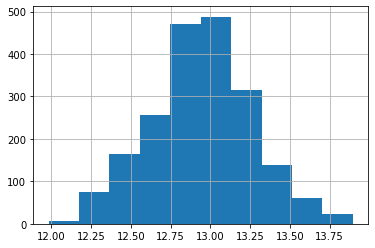

In [37]:
# take log of price and graph

df['log_Resale_Price']=np.log(df.Resale_Price)


df.log_Resale_Price.hist();

# looks so much better!

In [38]:
#fit and summarize
lsm = smf.ols('log_Resale_Price ~ Floor_Area_Sqm + Net_Remaining_Years + Mean_Storey', data = df)
fit1 = lsm.fit()
fit1.summary()  #results show that the variables are important in influencing the price, but only accounts for about 66% of the variance in the data.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_Resale_Price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1294.
Date:                Mon, 21 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:17:43   Log-Likelihood:                 545.25
No. Observations:                2000   AIC:                            -1083.
Df Residuals:                    1996   BIC:                            -1060.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.4398      0.027    417.105      0.000      11.386      11.494
Floor_Area_Sqm          0.0088      0.000     52.002      0.000       0.009       0.009
Net_Remaining_Years     0.0067      0.000     22.129      0.000       0.006       0.007
Mean_Storey             0.0143      0.001     18.967      0.000       0.013       0.016
==============================================================================
Omnibus:                      298.815   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              501.660
Skew:                           0.980   Prob(JB):                    1.16e-109
Kurtosis:                       4.477   Cond. No.                         845.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
df.columns

Index(['Block', 'Flat model', 'Flat type', 'Floor_Area_Sqm',
       'Lease commence date', 'Month', 'Remaining lease', 'Resale_Price',
       'Storey range', 'Street name', 'Town', 'Net_Remaining_Years',
       'Mean_Storey', 'log_Resale_Price'],
      dtype='object')

In [40]:
flats = df.select_dtypes(exclude=['object']).copy()
flats


,Flat type,Floor_Area_Sqm,Lease commence date,Resale_Price,Net_Remaining_Years,Mean_Storey,log_Resale_Price
0,4,92.0,2015.0,410000.0,94.500000,14.0,12.923912
1,4,93.0,2012.0,395000.0,91.416667,8.0,12.886641
2,4,92.0,2015.0,405888.0,94.083333,5.0,12.913833
3,4,92.0,2015.0,450000.0,94.083333,17.0,13.017003
4,4,92.0,2015.0,425000.0,94.500000,11.0,12.959844
...,...,...,...,...,...,...,...
1995,6,146.0,1987.0,575000.0,66.250000,11.0,13.262125
1996,6,146.0,1987.0,568888.0,65.833333,5.0,13.251439
1997,6,142.0,1987.0,540000.0,66.166667,11.0,13.199324
1998,6,145.0,1986.0,535000.0,65.000000,5.0,13.190022


In [41]:
#Model using Resale Price as response, leave out log resale price

flats = flats.drop(["Flat type", "Lease commence date"], axis=1)

In [42]:
flats['Town'] = df['Town']
flats.head(3)

,Floor_Area_Sqm,Resale_Price,Net_Remaining_Years,Mean_Storey,log_Resale_Price,Town
0,92.0,410000.0,94.500000,14.0,12.923912,BUKIT PANJANG
1,93.0,395000.0,91.416667,8.0,12.886641,BUKIT PANJANG
2,92.0,405888.0,94.083333,5.0,12.913833,BUKIT PANJANG


In [43]:
flats.replace({'Town':{'SEMBAWANG':'North','WOODLANDS':'North', 'YISHUN':'North'}},inplace = True)
flats.replace({'Town':{'ANG MO KIO':'North_East','HOUGANG':'North_East', 'PUNGGOL':'North_East', 'SENGKANG':'North_East', 'SERANGOON':'North_East'}},inplace = True)
flats.replace({'Town':{'BEDOK':'East','PASIR RIS':'East', 'TAMPINES':'East'}},inplace = True)
flats.replace({'Town':{'BUKIT BATOK':'West','BUKIT PANJANG':'West', 'CHOA CHU KANG':'West', 'CLEMENTI':'West', 'JURONG EAST':'West', 'JURONG WEST':'West', 'TENGAH':'West'}},inplace = True)
flats.replace({'Town':{'BISHAN':'Central','BUKIT MERAH':'Central', 'BUKIT TIMAH':'Central', 'CENTRAL AREA':'Central', 'GEYLANG':'Central', 'KALLANG/WHAMPOA':'Central', 'MARINE PARADE':'Central', 'QUEENSTOWN':'Central', 'TOA PAYOH':'Central'}},inplace = True)
flats

,Floor_Area_Sqm,Resale_Price,Net_Remaining_Years,Mean_Storey,log_Resale_Price,Town
0,92.0,410000.0,94.500000,14.0,12.923912,West
1,93.0,395000.0,91.416667,8.0,12.886641,West
2,92.0,405888.0,94.083333,5.0,12.913833,West
3,92.0,450000.0,94.083333,17.0,13.017003,West
4,92.0,425000.0,94.500000,11.0,12.959844,West
...,...,...,...,...,...,...
1995,146.0,575000.0,66.250000,11.0,13.262125,North
1996,146.0,568888.0,65.833333,5.0,13.251439,North
1997,142.0,540000.0,66.166667,11.0,13.199324,North
1998,145.0,535000.0,65.000000,5.0,13.190022,North


In [44]:
flats['Town'].nunique()

5

In [45]:
flats['Town'].value_counts()

North_East    565
West          482
North         403
Central       281
East          269
Name: Town, dtype: int64

In [46]:
pd.get_dummies(flats['Town']).head(3)

,Central,East,North,North_East,West
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1


In [47]:
flats = pd.get_dummies(flats, drop_first = True)
flats.head(3)

,Floor_Area_Sqm,Resale_Price,Net_Remaining_Years,Mean_Storey,log_Resale_Price,Town_East,Town_North,Town_North_East,Town_West
0,92.0,410000.0,94.500000,14.0,12.923912,0,0,0,1
1,93.0,395000.0,91.416667,8.0,12.886641,0,0,0,1
2,92.0,405888.0,94.083333,5.0,12.913833,0,0,0,1


In [48]:
housing = flats.drop(["log_Resale_Price"], axis=1)
housing

,Floor_Area_Sqm,Resale_Price,Net_Remaining_Years,Mean_Storey,Town_East,Town_North,Town_North_East,Town_West
0,92.0,410000.0,94.500000,14.0,0,0,0,1
1,93.0,395000.0,91.416667,8.0,0,0,0,1
2,92.0,405888.0,94.083333,5.0,0,0,0,1
3,92.0,450000.0,94.083333,17.0,0,0,0,1
4,92.0,425000.0,94.500000,11.0,0,0,0,1
...,...,...,...,...,...,...,...,...
1995,146.0,575000.0,66.250000,11.0,0,1,0,0
1996,146.0,568888.0,65.833333,5.0,0,1,0,0
1997,142.0,540000.0,66.166667,11.0,0,1,0,0
1998,145.0,535000.0,65.000000,5.0,0,1,0,0


In [49]:
housing_log = flats.drop(["Resale_Price"], axis=1)
housing_log

,Floor_Area_Sqm,Net_Remaining_Years,Mean_Storey,log_Resale_Price,Town_East,Town_North,Town_North_East,Town_West
0,92.0,94.500000,14.0,12.923912,0,0,0,1
1,93.0,91.416667,8.0,12.886641,0,0,0,1
2,92.0,94.083333,5.0,12.913833,0,0,0,1
3,92.0,94.083333,17.0,13.017003,0,0,0,1
4,92.0,94.500000,11.0,12.959844,0,0,0,1
...,...,...,...,...,...,...,...,...
1995,146.0,66.250000,11.0,13.262125,0,1,0,0
1996,146.0,65.833333,5.0,13.251439,0,1,0,0
1997,142.0,66.166667,11.0,13.199324,0,1,0,0
1998,145.0,65.000000,5.0,13.190022,0,1,0,0


In [50]:
#fit and summarize
lsm = smf.ols('Resale_Price ~ Floor_Area_Sqm + Net_Remaining_Years + Mean_Storey + Town_East + Town_North + Town_North_East + Town_West', data = flats)
fit1 = lsm.fit()
fit1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Resale_Price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     696.5
Date:                Mon, 21 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:17:43   Log-Likelihood:                -25347.
No. Observations:                2000   AIC:                         5.071e+04
Df Residuals:                    1992   BIC:                         5.075e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.917e+05   1.17e+04    -16.414      0.000   -2.15e+05   -1.69e+05
Floor_Area_Sqm       4190.8074     74.599     56.178      0.000    4044.507    4337.108
Net_Remaining_Years  4047.4365    145.608     27.797      0.000    3761.877    4332.996
Mean_Storey          5475.4765    325.838     16.804      0.000    4836.457    6114.496
Town_East           -1.174e+05   7184.325    -16.339      0.000   -1.31e+05   -1.03e+05
Town_North          -2.035e+05   6655.672    -30.568      0.000   -2.17e+05    -1.9e+05
Town_North_East      -1.54e+05   6611.580    -23.297      0.000   -1.67e+05   -1.41e+05
Town_West           -1.643e+05   6363.974    -25.810      0.000   -1.77e+05   -1.52e+05
==============================================================================
Omnibus:                      455.620   Durbin-Watson:                   0.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1126.942
Skew:                           1.229   Prob(JB):                    1.94e-245
Kurtosis:                       5.735   Cond. No.                         887.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# fit and summarize
lsm = smf.ols('log_Resale_Price ~ Floor_Area_Sqm + Net_Remaining_Years + Mean_Storey + Town_East + Town_North + Town_North_East + Town_West', data = flats)
fit1 = lsm.fit()
fit1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_Resale_Price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     978.6
Date:                Mon, 21 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:17:43   Log-Likelihood:                 955.60
No. Observations:                2000   AIC:                            -1895.
Df Residuals:                    1992   BIC:                            -1850.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.3984      0.023    502.255      0.000      11.354      11.443
Floor_Area_Sqm          0.0097      0.000     67.158      0.000       0.009       0.010
Net_Remaining_Years     0.0097      0.000     34.246      0.000       0.009       0.010
Mean_Storey             0.0107      0.001     16.908      0.000       0.009       0.012
Town_East              -0.1849      0.014    -13.249      0.000      -0.212      -0.158
Town_North             -0.3890      0.013    -30.082      0.000      -0.414      -0.364
Town_North_East        -0.2688      0.013    -20.925      0.000      -0.294      -0.244
Town_West              -0.2987      0.012    -24.158      0.000      -0.323      -0.274
==============================================================================
Omnibus:                      208.465   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.428
Skew:                           0.721   Prob(JB):                     4.88e-77
Kurtosis:                       4.463   Cond. No.                         887.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
from sklearn.model_selection import train_test_split

X, y = housing_log.drop('log_Resale_Price', axis=1), housing_log['log_Resale_Price']

# hold out 20% of the data for final testing, random state for identifying
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

# using train_test_split and random state 3 (for identifying), further partition X, y into datasets X_train, y_train (60% of original) and X_val, y_val (20%).
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [53]:
X_test.shape

(400, 7)

In [54]:
X_train.shape

(1200, 7)

In [55]:
X_val.shape

(400, 7)

In [56]:
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)
X_poly = poly.transform(X.values)

lm_poly = LinearRegression()

In [57]:
#validate
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.803
Ridge Regression val R^2: 0.803
Degree 2 polynomial regression val R^2: 0.829


In [58]:
#For our final step we retrain all three models on the entire chunk of train/val data and see how it does on test data.


Linear Regression test R^2: 0.783


[('Floor_Area_Sqm', 0.009801136354819093),
 ('Net_Remaining_Years', 0.009684869378072242),
 ('Mean_Storey', 0.011107850212216832),
 ('Town_East', -0.18941512327427884),
 ('Town_North', -0.39693929719307297),
 ('Town_North_East', -0.27292871746847086),
 ('Town_West', -0.30456902198673025)]

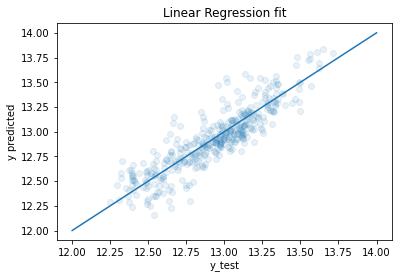

In [59]:
#Linear Regression simple train-val-test

lm.fit(X,y)

test_set_pred_lm = lm.predict(X_test)

plt.scatter(test_set_pred_lm, y_test, alpha=.1)
plt.plot(np.linspace(12,14,2), np.linspace(12,14,2))
plt.title("Linear Regression fit")
plt.xlabel("y_test")
plt.ylabel("y predicted")
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

list(zip(X_train.columns, lm.coef_)) 

In [60]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

#Mean Squared Error (MSE)
def mse(y_true, y_pred):
    return np.mean((y_pred - y_true)**2) 

In [61]:
mae(y_test, test_set_pred_lm)


0.11517056004574505

In [62]:
mse(y_test, test_set_pred_lm)

0.022781690136037733

Ridge Regression test R^2: 0.782


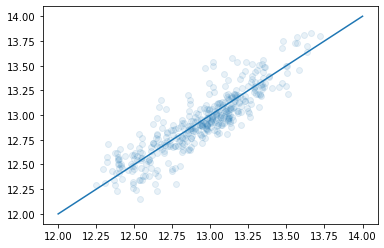

In [63]:
#Ridge Regression simple train-val-test (alpha = 1)

X_scaled = scaler.fit_transform(X)

lm_reg.fit(X_scaled,y)

test_set_pred_ridge = lm_reg.predict(X_test_scaled)

plt.scatter(test_set_pred_ridge, y_test, alpha=.1)
plt.plot(np.linspace(12,14,2), np.linspace(12,14,2))

print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

In [64]:
mae(y_test, test_set_pred_ridge)

0.11582990907488977

In [65]:
mse(y_test, test_set_pred_ridge)

0.022862983088413263

In [66]:
lm.fit(X_poly,y)
print(f'Polynomial Regression test R^2: {lm.score(X_test_poly, y_test):.3f}')   


Polynomial Regression test R^2: 0.841


In [67]:
#Use of cross validation method to verify the model results.

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state = 71)


In [68]:
#Linear Regression CV

print(cross_val_score(lm, X, y, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))


[0.74615993 0.78065282 0.74772183 0.7849254  0.78079559]
0.7680511159456014


In [69]:
#Ridge Regression CV

print(cross_val_score(lm_reg, X_scaled, y, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(lm_reg, X_scaled, y, cv=kf, scoring='r2')))

[0.7460234  0.78095357 0.74765591 0.78487714 0.78079142]
0.7680602897154545


In [70]:
#Poly Regression CV

print(cross_val_score(lm, X_poly, y, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(lm, X_poly, y, cv=kf, scoring='r2')))  

[0.77972324 0.81991423 0.79339057 0.82211934 0.82725229]
0.8084799323265954


In [71]:
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

In [72]:
 # Run the cross validation using LassoCV, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [73]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.01

In [74]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))  

[('Floor_Area_Sqm', 0.20946549839432496),
 ('Net_Remaining_Years', 0.0983608978908684),
 ('Mean_Storey', 0.06072032113676969),
 ('Town_East', -0.0),
 ('Town_North', -0.07722668110308926),
 ('Town_North_East', -0.027445069504278847),
 ('Town_West', -0.04861388430341442)]

In [75]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_test_scaled)  #based on x scaled test values

Text(0, 0.5, 'y predicted')

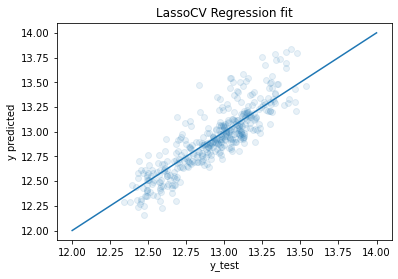

In [76]:
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(12,14,2), np.linspace(12,14,2))
plt.title("LassoCV Regression fit")
plt.xlabel("y_test")
plt.ylabel("y predicted")

In [77]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [78]:
#Mean Squared Error (MSE)
def mse(y_true, y_pred):
    return np.mean((y_pred - y_true)**2) 

In [79]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

0.12167531074045111

In [80]:
mse(y_test, test_set_pred)

0.02642659966774401

In [81]:
r2_score(y_test, test_set_pred)

0.7481821889726094

In [82]:
 # Run the cross validation using RidgeCV, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

Ridge_model = RidgeCV(alphas = alphavec, cv=5)
Ridge_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [83]:
Ridge_model.alpha_

0.08026433522257174

In [84]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, Ridge_model.coef_))

[('Floor_Area_Sqm', 0.23406358725208903),
 ('Net_Remaining_Years', 0.13295950819289182),
 ('Mean_Storey', 0.05993472989245225),
 ('Town_East', -0.06361514569907717),
 ('Town_North', -0.15324492368162407),
 ('Town_North_East', -0.11749071879328513),
 ('Town_West', -0.12951288054384888)]

In [85]:
# Make predictions on the test set using the new model
test_set_pred_Ridge = Ridge_model.predict(X_test_scaled)  #based on x scaled test values

Text(0, 0.5, 'y predicted')

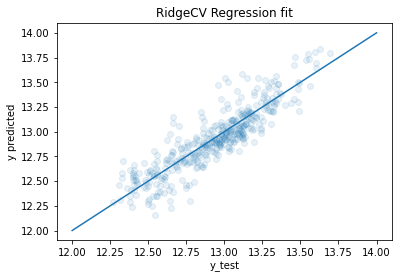

In [86]:
plt.scatter(test_set_pred_Ridge, y_test, alpha=.1)
plt.plot(np.linspace(12,14,2), np.linspace(12,14,2))
plt.title("RidgeCV Regression fit")
plt.xlabel("y_test")
plt.ylabel("y predicted")  #Points are very symmetric around the predicted line. Model is able to predict well.

In [87]:
mae(y_test, test_set_pred_Ridge)

0.11418142310172127

In [88]:
mse(y_test, test_set_pred_Ridge)

0.022711906416459548

In [89]:
r2_score(y_test, test_set_pred_Ridge)

0.7835793242430407

Text(0, 0.5, 'residuals')

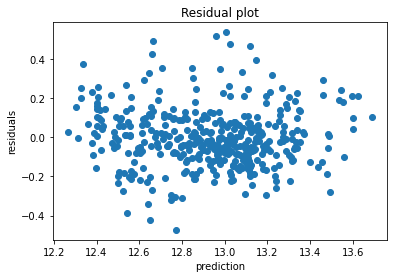

In [90]:
res = y_test - test_set_pred_Ridge
plt.scatter(test_set_pred_Ridge, res)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")


Text(0.5, 1.0, 'Normal Q-Q plot')

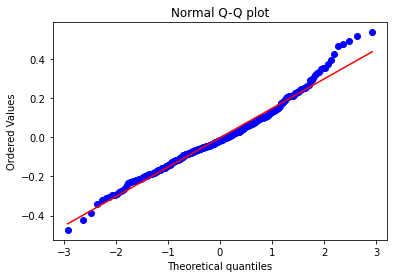

In [91]:
#Generates a probability plot of sample data against the quantiles of a 
# specified theoretical distribution 
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

In [92]:

#Plot formed a relatively straight line for majority of the theoretical quantiles except the higher quantiles. 
#This signifies that my real data is not too skewed.  
#But my real data has some extremeties compared to a truly normally distributed data.'


Text(0.5, 1.0, 'Distribution of Residuals')

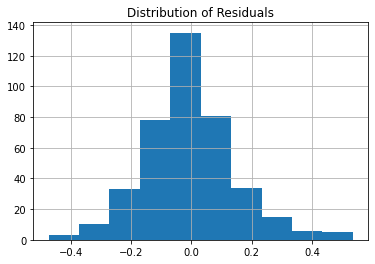

In [93]:
res.hist()
plt.title("Distribution of Residuals")

